# Deep Learning - Classification Example

I demonstrate the use of Deep Learning with Keras. 

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 

from sklearn.model_selection import train_test_split
from sklearn.datasets import load_iris

from tensorflow.keras.utils import to_categorical
import tensorflow as tf
from tensorflow import keras

from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.models import Sequential
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import load_model
from tensorflow.keras.callbacks import EarlyStopping

# Data

In [4]:
data = load_iris()
# print(data.DESCR)

In [5]:
X, y = load_iris(return_X_y=True, as_frame=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# EDA

In [6]:
X_train.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
22,4.6,3.6,1.0,0.2
15,5.7,4.4,1.5,0.4
65,6.7,3.1,4.4,1.4
11,4.8,3.4,1.6,0.2
42,4.4,3.2,1.3,0.2


In [7]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 120 entries, 22 to 102
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  120 non-null    float64
 1   sepal width (cm)   120 non-null    float64
 2   petal length (cm)  120 non-null    float64
 3   petal width (cm)   120 non-null    float64
dtypes: float64(4)
memory usage: 4.7 KB


In [6]:
# y_train.value_counts()

# Modelling the Data

In [13]:
n_cols = X_train.shape[1]

model = Sequential()
model.add(Input(shape=(n_cols,)))
model.add(Dense(100, activation = 'relu'))
model.add(Dense(50, activation = 'relu'))
# In the last layer (output layer) we have 3 nodes since 3 classes to predict and therefore use softmax. 
model.add(Dense(3, activation = 'softmax'))

If there are two or more label classes represented as a one-hot representation --> Use crossentropy in the compile step. 

If the labels are represented as integers, e.g. [0, 3, 2] --> Use SparseCategoricalCrossentropy in the compile step.

Check documentation: https://keras.io/api/losses/probabilistic_losses/#categoricalcrossentropy-class


In [12]:
print(y_train.shape)
print(y_train)

# If we would like to use the CategoricalCrossentropy in the compile step as loss we would simply run this code: 
# y_train = to_categorical(y_train)

(120,)
22     0
15     0
65     1
11     0
42     0
      ..
71     1
106    2
14     0
92     1
102    2
Name: target, Length: 120, dtype: int64


In [14]:
model.compile(optimizer = 'adam', loss = 'SparseCategoricalCrossentropy', metrics = ['accuracy'])

In [15]:
early_stopping_monitor = EarlyStopping(patience = 2)
model_trained = model.fit(X_train, y_train, validation_split = 0.2, epochs = 100, callbacks = [early_stopping_monitor])

Epoch 1/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step - accuracy: 0.3581 - loss: 1.1787 - val_accuracy: 0.5000 - val_loss: 1.1094
Epoch 2/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.6953 - loss: 1.0405 - val_accuracy: 0.5000 - val_loss: 0.9888
Epoch 3/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.7227 - loss: 0.9653 - val_accuracy: 0.5417 - val_loss: 0.9022
Epoch 4/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.7669 - loss: 0.8974 - val_accuracy: 0.6250 - val_loss: 0.8412
Epoch 5/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.7995 - loss: 0.8370 - val_accuracy: 0.7500 - val_loss: 0.7843
Epoch 6/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.8307 - loss: 0.7814 - val_accuracy: 0.8750 - val_loss: 0.7363
Epoch 7/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.7760 - loss: 0.7302 - val_accuracy: 0.7917 - val_loss: 0.7049
Epoch 8/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.7526 - loss: 0.6957 - val_accuracy: 0.9167 - val_loss: 0

In [16]:
print(model_trained.history.keys())

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])


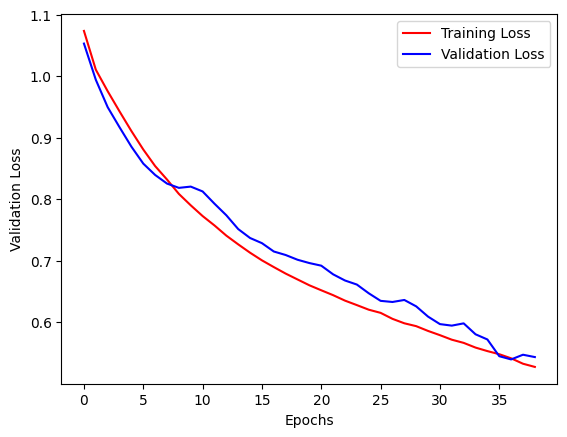

In [17]:
plt.plot(np.sqrt(model_trained.history['loss']), 'r', label='Training Loss')
plt.plot(np.sqrt(model_trained.history['val_loss']), 'b', label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Validation Loss')
plt.legend()

# Evaluating the model on the test data

In [19]:
model.evaluate(X_test, y_test)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 1.0000 - loss: 0.2760


[0.2760143578052521, 1.0]